In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Basic Information
## We want basic 4 vector or related variables

## eta

4mu eta structure: [[0.851, 0.624, 0.857, 0.585], [-1.58, -1.89, ... -1.72], [1.46, 0.311, 0.336, 1.51]]
2mu2e eta structure: [[2.33, 2.35], [-0.658, -0.563], [1.04, ... [-2.1, 0.0717, 0.0715], [-1.77, -1.75]]
4mu eta structure: [[-1.24, 0.266, 0.257, -1.27], ... -0.884, -1.36, -1.36, -0.836, -1.76, -1.78]]
2mu2e eta structure: [[-0.0941, -0.105], [0.92, 0.902], [0.0773, ... [0.0593, 0.0193], [1.61, 1.48, 1.78]]
4mu eta structure: [[-1.88, 0.0124, -1.92, 0.302, -1.94], ... [-1.09, -1.11, -1.08, -1.98, -2.03]]
2mu2e eta structure: [[0.248, 0.219], [0.933, 0.971], [-0.152, ... [-0.151, -0.189], [-0.815, -0.798]]
4mu eta structure: [[0.295, 1.76, 0.34, 1.73], [-0.836, ... [0.572, 0.592, 0.683, 0.508, 0.506]]
2mu2e eta structure: [[0.55, 0.577], [-0.0189, 0.037], [1.61, ... [-0.247, 2.22], [0.0323, -0.0227]]
4mu eta structure: [[0.672, 1.08, 1.1], [], [-0.169, -0.134, ... [0.0537, -1.43], [-0.0776, -0.0309]]
2mu2e eta structure: [[0.967, 1.02, 0.647], [-0.147], [0.151], ... 0.158, 0.16], [

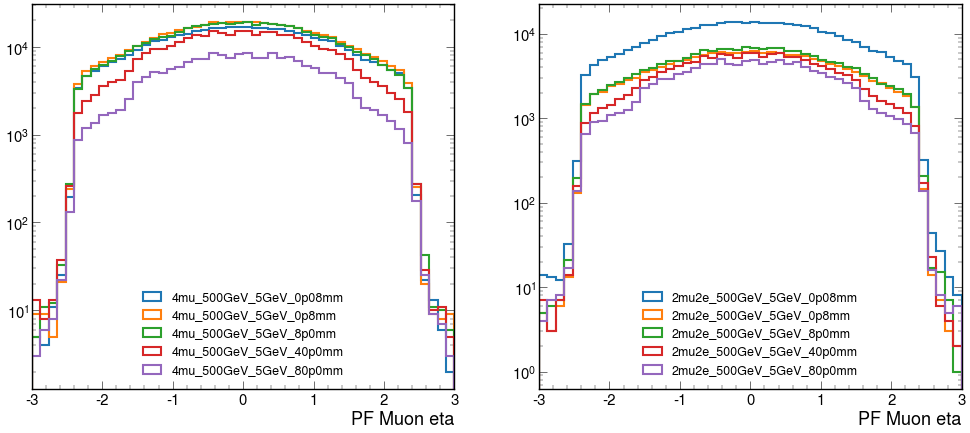

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_xlabel('PF Muon eta')
ax[1].set_xlabel('PF Muon eta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Basic/eta.png", bbox_inches="tight")

## mass

4mu mass structure: [[0.106, 0.106, 0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106], [0.106, 0.106], [0.106, ... [0.106, 0.106, 0.106], [0.106, 0.106]]
4mu mass structure: [[0.106, 0.106, 0.106, 0.106], [0.106, ... 0.106, 0.106, 0.106, 0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106], [0.106, 0.106], [0.106, ... [0.106, 0.106], [0.106, 0.106, 0.106]]
4mu mass structure: [[0.106, 0.106, 0.106, 0.106, 0.106], ... [0.106, 0.106, 0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106], [0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106], [0.106, 0.106]]
4mu mass structure: [[0.106, 0.106, 0.106, 0.106], [0.106, ... [0.106, 0.106, 0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106], [0.106, 0.106], [0.106], ... 0.106], [0.106, 0.106], [0.106, 0.106]]
4mu mass structure: [[0.106, 0.106, 0.106], [], [0.106, 0.106, ... [0.106, 0.106], [0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106, 0.106], [0.106], [0.106], ... 

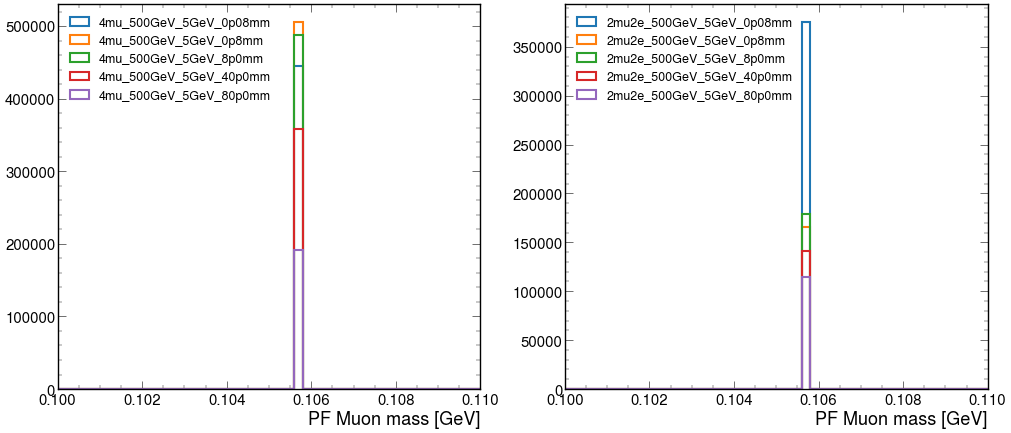

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mass", events_4mu[i_4mu].mass, events_2mu2e[i_2mu].mass)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mass), range=(0.1,0.110), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mass), range=(0.1,0.110), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0.1,0.110)
ax[1].set_xlim(0.1,0.110)
ax[0].set_xlabel('PF Muon mass [GeV]')
ax[1].set_xlabel('PF Muon mass [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Basic/mass.png", bbox_inches="tight")

## phi

4mu phi structure: [[0.199, -2.96, 0.156, -2.99], [1.31, -1.83, ... -0.167, 3], [-1.12, 2, 2.04, -1.17]]
2mu2e phi structure: [[2.13, 2.23], [3.1, 3.01], [0.4, 1.4, ... [2.53, 0.988, 1.03], [-2.27, -2.22]]
4mu phi structure: [[-2.67, 0.482, 0.477, -2.71], [-2.01, ... [0.187, -2.59, -2.55, 0.155, 1.6, 1.58]]
2mu2e phi structure: [[1.27, 1.32], [0.184, 0.329], [-1.58, ... [-0.292, -0.307], [2.73, 2.58, 2.02]]
4mu phi structure: [[-0.724, 2.45, -0.776, 2.73, 1.58], ... [0.0318, 0.033, 0.0113, -2.37, -2.35]]
2mu2e phi structure: [[-1.63, -1.66], [1.6, 1.61], [2.36, ... -0.448], [-0.156, -0.113], [1.65, 1.62]]
4mu phi structure: [[-0.487, 2.43, -0.505, 2.51], [-1.96, ... [2.68, 2.66, -1.06, -1.06, -1.05]]
2mu2e phi structure: [[0.703, 0.671], [-1.56, -1.43], [3.04], ... [0.788], [-1.37, -0.707], [-2.94, -2.9]]
4mu phi structure: [[-0.88, 2.31, 1.92], [], [-2.83, 0.339, ... -1.9], [-1.15, 1.99], [2.86, -0.801]]
2mu2e phi structure: [[-2.12, -2.16, 0.884], [-2.36], [-0.329], ... [1.44, 1.47],

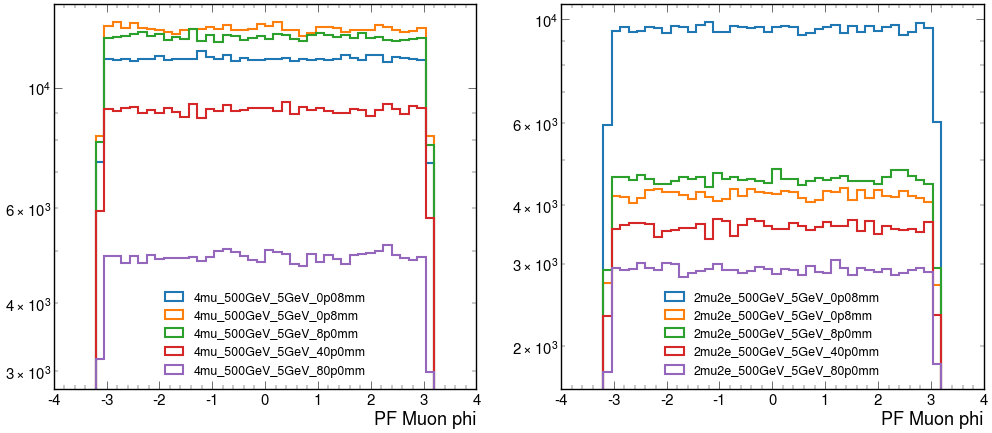

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi", events_4mu[i_4mu].phi, events_2mu2e[i_2mu].phi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('PF Muon phi')
ax[1].set_xlabel('PF Muon phi')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Basic/phi.png", bbox_inches="tight")

## pt

4mu pt structure: [[187, 178, 73.8, 65.7], [232, 182, 63.8, ... 49.3, 22.1], [169, 138, 88.6, 33.1]]
2mu2e pt structure: [[85.5, 25.5], [239, 6.4], [196, 17.8, 6.03, ... 23], [136, 135, 121], [157, 53.3]]
4mu pt structure: [[131, 99.6, 86.5, 59], [206, 184, 63.2, ... [216, 169, 78.4, 36.5, 17.8, 12.1]]
2mu2e pt structure: [[110, 82.1], [246, 6.21], [211, 41.3], ... 238, 14], [142, 96], [107, 6.16, 3.95]]
4mu pt structure: [[120, 98.7, 50.8, 23.1, 3.56], [404, 215, ... 51], [1.94e+03, 180, 166, 100, 64.2]]
2mu2e pt structure: [[120, 98.3], [139, 109], [177, 17.6], ... 9.36, 6.09], [219, 38.7], [148, 91.7]]
4mu pt structure: [[258, 186, 82.5, 25.4], [544, 194, ... 15.9], [1.73e+03, 1.14e+03, 206, 184, 29.4]]
2mu2e pt structure: [[162, 73.5], [167, 7.38], [119], [279], ... 4.1], [37.7], [763, 15.8], [166, 34.2]]
4mu pt structure: [[85.5, 16.5, 4.3], [], [598, 197, 92.8], ... 171, 69.5], [181, 142], [98.1, 21.3]]
2mu2e pt structure: [[222, 29, 21.7], [234], [223], [3.51], ... [22.8], [339,

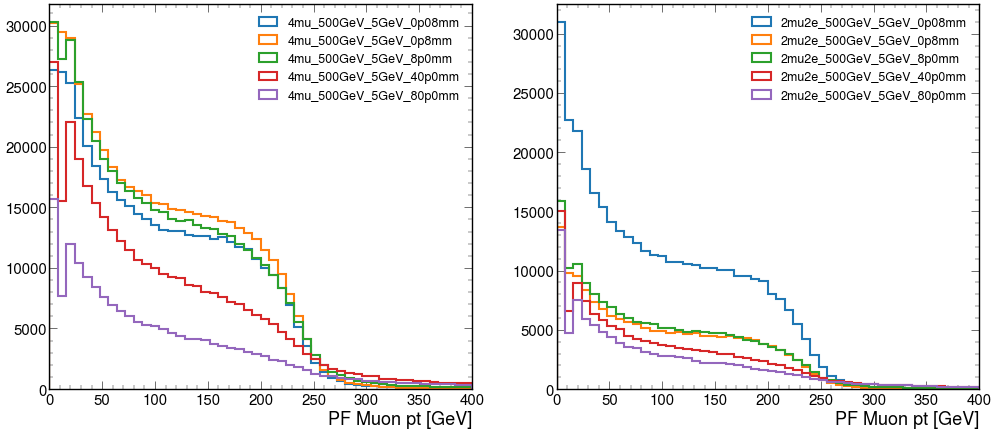

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,400)
ax[1].set_xlim(0,400)
ax[0].set_xlabel('PF Muon pt [GeV]')
ax[1].set_xlabel('PF Muon pt [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Basic/pt.png", bbox_inches="tight")

## outerEta

4mu outerEta structure: [[0.849, 0.624, 0.857, 0.585], [-1.58, -1.89, ... -1.72], [1.46, 0.311, 0.338, 1.52]]
2mu2e outerEta structure: [[2.33, 2.35], [-0.658, -0.556], [1.04, ... [-1.94, 0.0717, 0.0704], [-1.76, -1.75]]
4mu outerEta structure: [[-1.25, 0.267, 0.318, -1.27], ... -0.884, -1.36, -1.36, -0.833, -1.76, -1.81]]
2mu2e outerEta structure: [[-0.0941, -0.103], [0.868, 0.829], ... [0.0588, 0.0632], [1.61, 1.49, 1.78]]
4mu outerEta structure: [[-1.88, 0.153, -1.92, 0.297, -1.95], ... [-1.09, -1.11, -1.08, -1.98, -2.03]]
2mu2e outerEta structure: [[0.249, 0.219], [0.933, 0.973], [-0.15, ... [-0.151, -0.189], [-0.815, -0.793]]
4mu outerEta structure: [[0.294, 1.76, 0.34, 1.71], [-0.832, ... [0.572, 0.593, 0.683, 0.508, 0.505]]
2mu2e outerEta structure: [[0.552, 0.582], [-0.0182, 0.0311], [1.62, ... [-0.247, 2.22], [0.031, -0.0274]]
4mu outerEta structure: [[0.674, 1.08, 1.12], [], [-0.169, -0.134, ... [0.054, -1.43], [-0.0772, -0.0149]]
2mu2e outerEta structure: [[0.967, 1.02, 0.63

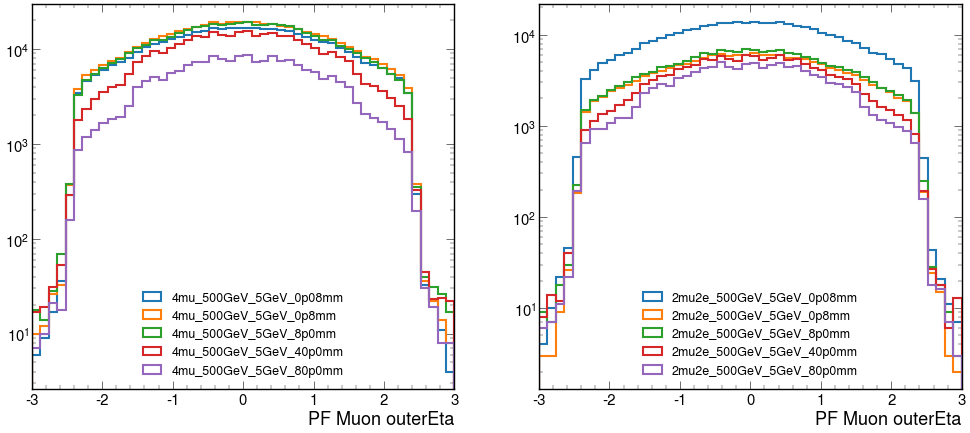

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("outerEta", events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].outerEta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].outerEta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_xlabel('PF Muon outerEta')
ax[1].set_xlabel('PF Muon outerEta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Basic/outerEta.png", bbox_inches="tight")

## eta - outerEta

4mu eta - outerEta structure: [[0.00246, -0.00037, -8.58e-06, 4.02e-05, ... 2.79e-05, -0.00191, -0.0138]]
2mu2e eta - outerEta structure: [[4.34e-05, 0.00147], [-0.000499, -0.00736, ... 0.00111], [-0.0112, 0.000186]]
4mu eta - outerEta structure: [[0.00195, -0.000974, -0.0606, 1.65e-05], ... 2.98e-06, -0.0034, -5.91e-05, 0.031]]
2mu2e eta - outerEta structure: [[-1.8e-05, -0.00223], [0.0525, 0.0731], ... -0.0439], [-0.00105, -0.0113, 1.91e-06]]
4mu eta - outerEta structure: [[-0.000587, -0.14, -0.000135, 0.00454, ... -0.000119, -0.000401, 3.58e-05]]
2mu2e eta - outerEta structure: [[-0.000865, -5.5e-06], [7.17e-05, -0.00181, ... 3.26e-06], [-8.64e-06, -0.0044]]
4mu eta - outerEta structure: [[0.000215, -6.97e-05, -0.000278, 0.0192, ... 1.32e-05, -7.39e-05, 0.00107]]
2mu2e eta - outerEta structure: [[-0.00229, -0.00538], [-0.000735, 0.00588, ... 0.000705], [0.0013, 0.00477]]
4mu eta - outerEta structure: [[-0.00221, 0.00893, -0.0146], [], ... -0.000249, -0.000636], [-0.000342, -0.016]]


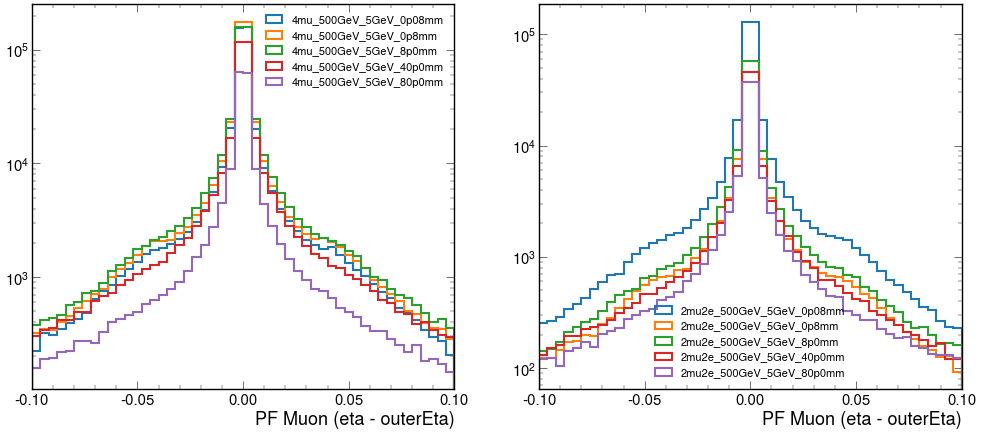

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta - outerEta", events_4mu[i_4mu].eta - events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta - events_4mu[i_4mu].outerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].outerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (eta - outerEta)')
ax[1].set_xlabel('PF Muon (eta - outerEta)')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([-0.1,-0.05,0,0.05,0.1])
ax[1].set_xticks([-0.1,-0.05,0,0.05,0.1])
plt.savefig("../Plots/PF_MUON/Basic/eta-outerEta.png", bbox_inches="tight")

## outerPhi

4mu outerPhi structure: [[0.181, -2.98, 0.172, -2.97], [1.3, -1.83, ... 2.96], [-1.11, 2.01, 2.01, -1.21]]
2mu2e outerPhi structure: [[2.14, 2.19], [3.09, -2.73], [0.385, 1.23, ... [2.52, 0.997, 1], [-2.28, -2.2]]
4mu outerPhi structure: [[-2.65, 0.515, 0.446, -2.74], [-1.99, ... [0.201, -2.58, -2.56, 0.0659, 1.62, 1.73]]
2mu2e outerPhi structure: [[1.28, 1.3], [0.195, -0.185], [-1.59, ... [-0.27, -0.338], [2.71, 2.86, 2.13]]
4mu outerPhi structure: [[-0.737, 2.43, -0.758, 2.93, 1.38], ... [0.0304, 0.0196, 0.0184, -2.37, -2.36]]
2mu2e outerPhi structure: [[-1.66, -1.65], [1.62, 1.59], [2.34, ... -0.336], [-0.142, -0.144], [1.66, 1.59]]
4mu outerPhi structure: [[-0.498, 2.44, -0.472, 2.49], [-1.96, ... [2.69, 2.66, -1.05, -1.04, -1.16]]
2mu2e outerPhi structure: [[0.723, 0.627], [-1.55, -1.87], [3.02], ... 0.886], [-1.36, -0.748], [-2.95, -2.81]]
4mu outerPhi structure: [[-0.814, 2.48, 2.34], [], [-2.82, 0.355, ... -1.9], [-1.14, 2], [2.84, -0.664]]
2mu2e outerPhi structure: [[-2.14, -2

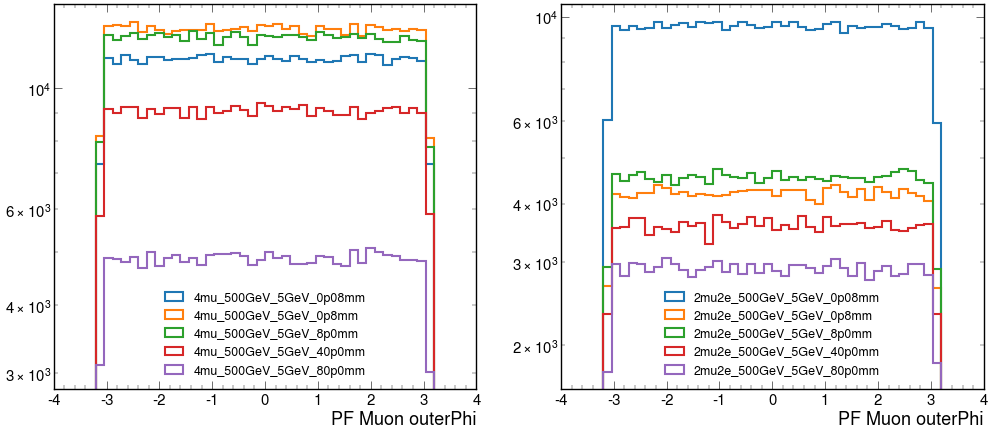

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("outerPhi", events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].outerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].outerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('PF Muon outerPhi')
ax[1].set_xlabel('PF Muon outerPhi')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Basic/outerPhi.png", bbox_inches="tight")

## phi - outerPhi

4mu phi - outerPhi structure: [[0.0177, 0.0182, -0.0165, -0.0191], ... [-0.0118, -0.00897, 0.0354, 0.0423]]
2mu2e phi - outerPhi structure: [[-0.0103, 0.0418], [0.013, 5.74], ... 0.00986, -0.00928, 0.0239], [0.0109, -0.02]]
4mu phi - outerPhi structure: [[-0.0195, -0.0323, 0.0308, 0.0211], ... -0.0121, 0.0157, 0.0893, -0.0189, -0.155]]
2mu2e phi - outerPhi structure: [[-0.0115, 0.0221], [-0.011, 0.514], ... -0.0221, 0.0307], [0.0193, -0.274, -0.112]]
4mu phi - outerPhi structure: [[0.0136, 0.0224, -0.0176, -0.197, 0.201, ... 0.0134, -0.00717, 0.00564, 0.012]]
2mu2e phi - outerPhi structure: [[0.0279, -0.0124], [-0.019, 0.0253], ... [-0.0143, 0.0314], [-0.00848, 0.0344]]
4mu phi - outerPhi structure: [[0.0107, -0.00549, -0.0334, 0.0237], ... -0.0067, 0.00238, -0.0125, -0.0187, 0.111]]
2mu2e phi - outerPhi structure: [[-0.0207, 0.0439], [-0.0167, 0.446], ... [-0.00396, 0.0412], [0.0185, -0.0884]]
4mu phi - outerPhi structure: [[-0.0666, -0.175, -0.418], [], [-0.00625, ... [-0.0129, -0.01

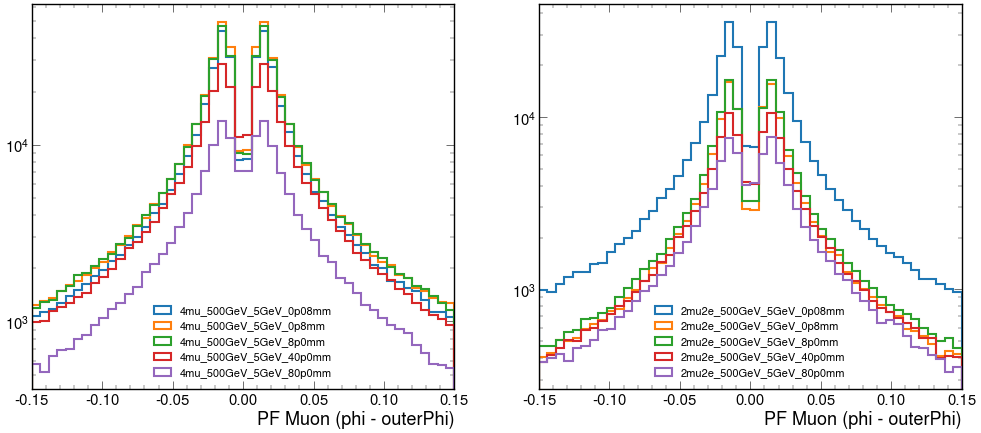

In [16]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi - outerPhi", events_4mu[i_4mu].phi - events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi - events_4mu[i_4mu].outerPhi), range=(-0.15,0.15), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].outerPhi), range=(-0.15,0.15), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.15,0.15)
ax[1].set_xlim(-0.15,0.15)
ax[0].set_xlabel('PF Muon (phi - outerPhi)')
ax[1].set_xlabel('PF Muon (phi - outerPhi)')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Basic/phi-outerPhi.png", bbox_inches="tight")

## innerPt

In [14]:
import awkward as ak

In [15]:
print(min(ak.flatten(events_4mu[i_4mu].innerPt)))

-1.0


4mu innerPt structure: [[187, 178, 73.8, 65.7], [236, 182, 63.8, ... 49.3, 22.1], [169, 138, 88.6, 33.1]]
2mu2e innerPt structure: [[85.5, 25.5], [241, 6.4], [196, 17.8, 6.03, ... 23], [-1, 135, 121], [157, 53.3]]
4mu innerPt structure: [[131, 99.6, 86.5, 59], [207, 184, 63.2, ... [218, 169, 78.4, 36.5, 17.8, 12.1]]
2mu2e innerPt structure: [[110, 82.1], [240, 6.21], [214, 41.3], ... 246, 14], [142, 96], [107, 6.16, 3.95]]
4mu innerPt structure: [[120, 182, 50.8, -1, 3.56], [-1, 226, ... 51], [1.94e+03, 218, 166, 100, 64.2]]
2mu2e innerPt structure: [[120, 98.3], [139, 109], [177, 17.6], ... 9.36, 6.09], [223, 38.7], [148, 91.7]]
4mu innerPt structure: [[-1, 186, -1, 25.4], [-1, -1, -1, 3.86], ... -1, -1, -1, -1], [-1, -1, -1, -1, -1]]
2mu2e innerPt structure: [[162, 73.5], [167, 7.38], [119], [-1], ... 4.1], [-1], [-1, 15.8], [166, 34.2]]
4mu innerPt structure: [[-1, -1, 9.73], [], [-1, -1, 92.8], [-1, ... [-1, 171, 69.5], [-1, 142], [-1, 21.3]]
2mu2e innerPt structure: [[-1, 117, -1]

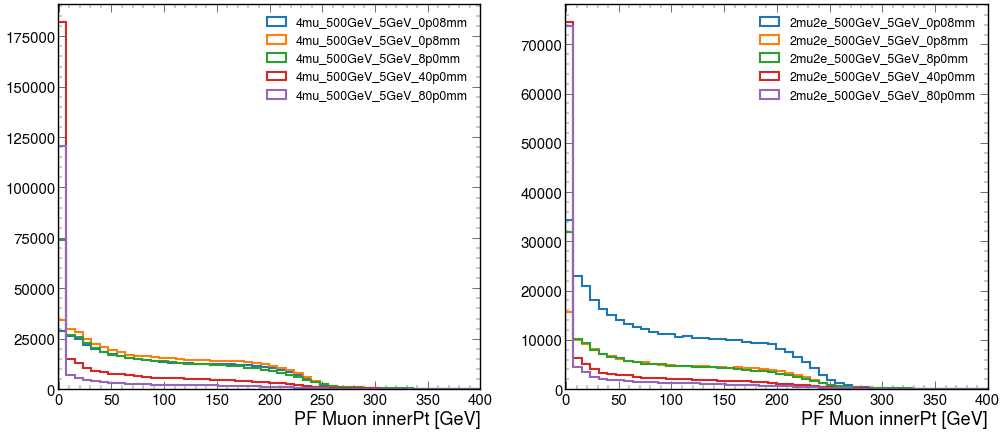

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerPt", events_4mu[i_4mu].innerPt, events_2mu2e[i_2mu].innerPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerPt), range=(-1,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerPt), range=(-1,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-1,400)
ax[1].set_xlim(-1,400)
ax[0].set_xlabel('PF Muon innerPt [GeV]')
ax[1].set_xlabel('PF Muon innerPt [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Basic/innerPt.png", bbox_inches="tight")

## pt - innerPt

4mu pt - innerPt structure: [[0, 0, 0, 0], [-3.93, 0, 0, 17.6, 0], [-3.21, ... 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e pt - innerPt structure: [[0, 0], [-1.41, 0], [0, 0, 0], [0, 0], ... [0, 0], [-1.31, 0], [137, 0, 0], [0, 0]]
4mu pt - innerPt structure: [[0, 0, 0, 0], [-0.687, 0, 0, 0], [0, 0, ... [0, 0, 0, 0], [-2.1, 0, 0, 0, 0, 0]]
2mu2e pt - innerPt structure: [[0, 0], [5.45, 0], [-2.25, 0], [0, 0], ... 0, 0], [-7.78, 0], [0, 0], [0, 0, 0]]
4mu pt - innerPt structure: [[0, -83, 0, 24.1, 0], [405, -11.1, 0], [0, ... [0, 0, 4.98, 0], [0, -38.2, 0, 0, 0]]
2mu2e pt - innerPt structure: [[0, 0], [0, 0], [0, 0], [0, 0], [0, ... [3.47, 0], [0, 0, 0, 0], [-4.6, 0], [0, 0]]
4mu pt - innerPt structure: [[259, 0, 83.5, 0], [545, 195, 128, ... 16.9], [1.73e+03, 1.14e+03, 207, 185, 30.4]]
2mu2e pt - innerPt structure: [[0, 0], [0, 0], [0], [280], [0, 75.4, 0, ... [0, 0, 0], [38.7], [764, 0], [0, 0]]
4mu pt - innerPt structure: [[86.5, 17.5, -5.44], [], [599, 198, 0], [201, ... [258, 0, 0], [1

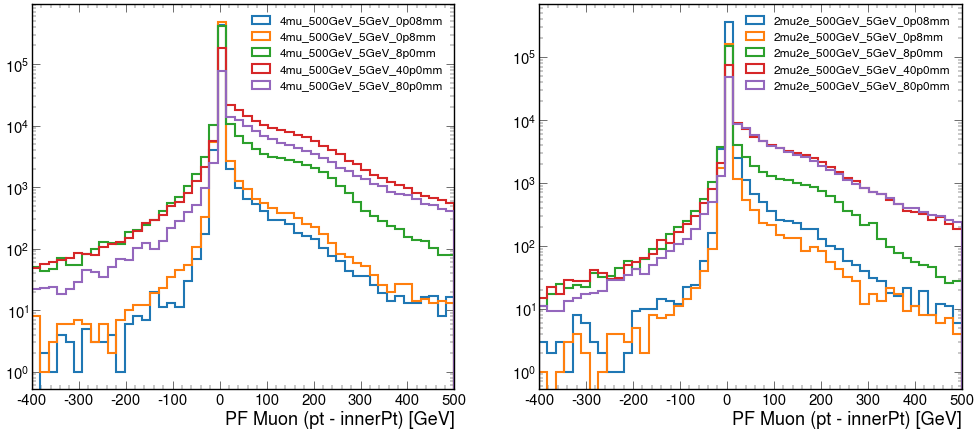

In [21]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt - innerPt", events_4mu[i_4mu].pt - events_4mu[i_4mu].innerPt, events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].innerPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt - events_4mu[i_4mu].innerPt), range=(-400,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].innerPt), range=(-400,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-400,500)
ax[1].set_xlim(-400,500)
ax[0].set_xlabel('PF Muon (pt - innerPt) [GeV]')
ax[1].set_xlabel('PF Muon (pt - innerPt) [GeV]')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=17)
ax[1].legend(fontsize=17)
plt.savefig("../Plots/PF_MUON/Basic/pt-innerPt.png", bbox_inches="tight")

## innerEta

4mu innerEta structure: [[0.851, 0.624, 0.857, 0.585], [-1.58, -1.89, ... -1.72], [1.46, 0.311, 0.336, 1.51]]
2mu2e innerEta structure: [[2.33, 2.35], [-0.658, -0.564], [1.04, ... [-5, 0.0717, 0.0715], [-1.77, -1.75]]
4mu innerEta structure: [[-1.24, 0.266, 0.257, -1.27], ... -0.884, -1.36, -1.36, -0.836, -1.76, -1.78]]
2mu2e innerEta structure: [[-0.0941, -0.105], [0.92, 0.902], [0.0772, ... [0.0593, 0.0193], [1.61, 1.48, 1.78]]
4mu innerEta structure: [[-1.88, -0.0514, -1.92, -5, -1.94], [-5, ... [-1.09, -1.11, -1.08, -1.98, -2.03]]
2mu2e innerEta structure: [[0.248, 0.219], [0.933, 0.971], [-0.152, ... [-0.151, -0.189], [-0.815, -0.798]]
4mu innerEta structure: [[-5, 1.76, -5, 1.73], [-5, -5, -5, -0.895], ... -5, -5, -5], [-5, -5, -5, -5, -5]]
2mu2e innerEta structure: [[0.55, 0.577], [-0.0189, 0.037], [1.61], ... [-5], [-5, 2.22], [0.0323, -0.0227]]
4mu innerEta structure: [[-5, -5, 1.1], [], [-5, -5, -0.134], ... -0.56, -0.517], [-5, -1.43], [-5, -0.0309]]
2mu2e innerEta structure

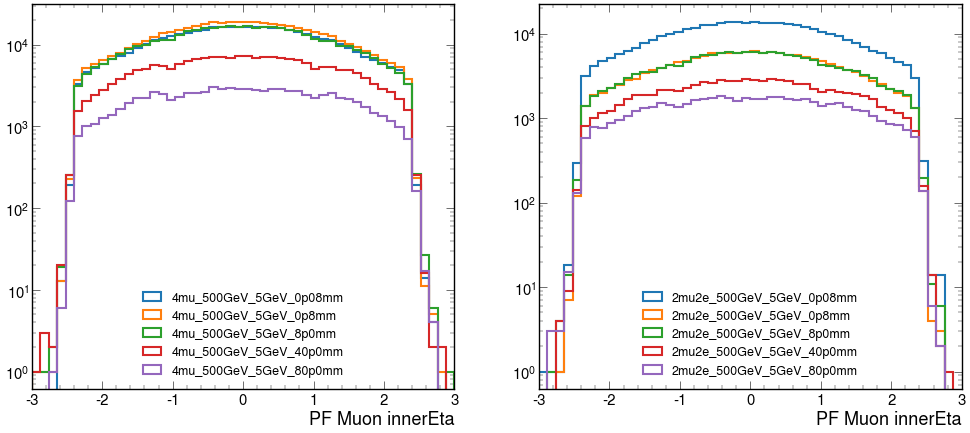

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerEta", events_4mu[i_4mu].innerEta, events_2mu2e[i_2mu].innerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerEta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerEta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_xlabel('PF Muon innerEta')
ax[1].set_xlabel('PF Muon innerEta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Basic/innerEta.png", bbox_inches="tight")

## eta - innerEta

4mu eta - innerEta structure: [[-4.65e-06, -2.07e-05, -6.97e-06, 5.45e-05, ... 1.98e-05, -1.79e-05, -0.000107]]
2mu2e eta - innerEta structure: [[0.000184, -0.000146], [-2.35e-05, 4.29e-05, ... -2.96e-06], [9.39e-05, 8.96e-05]]
4mu eta - innerEta structure: [[-2.53e-05, 8.58e-06, 1.07e-05, 4.16e-05, ... 2.35e-05, -7.62e-05, -2e-05]]
2mu2e eta - innerEta structure: [[-1.65e-06, 7.03e-06], [4.43e-05, ... [-4.33e-05, 0.000122, -2.44e-05]]
4mu eta - innerEta structure: [[-6.12e-05, 0.0638, -0.000114, 5.3, ... 0.00111, -0.000119, 1.97e-05, 5.22e-05]]
2mu2e eta - innerEta structure: [[-1.77e-06, 2.12e-06], [-4.43e-05, 2.32e-05, ... 6.63e-06], [-7.39e-06, 4.24e-05]]
4mu eta - innerEta structure: [[5.29, -3.71e-05, 5.34, 2.11e-05], [4.16, ... [5.57, 5.59, 5.68, 5.51, 5.51]]
2mu2e eta - innerEta structure: [[3.3e-05, -3.69e-05], [3.74e-07, -1.91e-06, ... -0.00018], [-5.66e-07, -1.04e-06]]
4mu eta - innerEta structure: [[5.67, 6.08, -0.000241], [], [4.83, 4.87, ... [5.05, 3.28e-05], [4.92, 1.64e

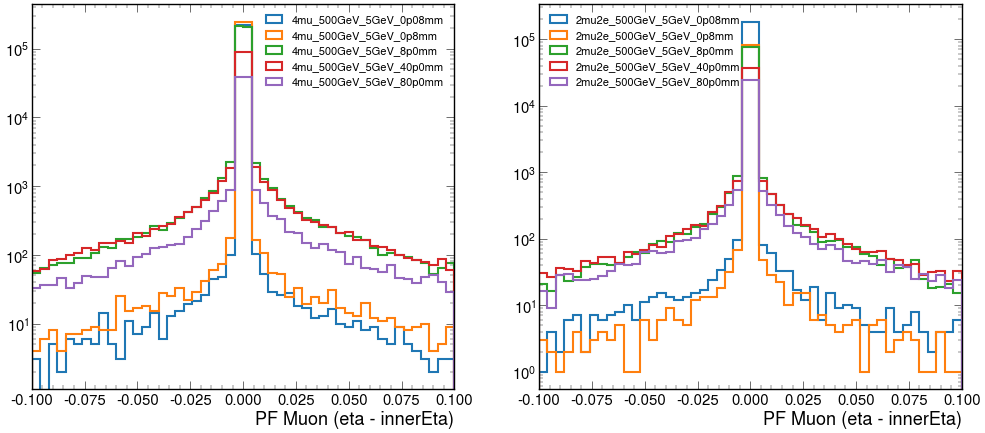

In [24]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta - innerEta", events_4mu[i_4mu].eta - events_4mu[i_4mu].innerEta, events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].innerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta - events_4mu[i_4mu].innerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].innerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (eta - innerEta)')
ax[1].set_xlabel('PF Muon (eta - innerEta)')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
plt.savefig("../Plots/PF_MUON/Basic/eta-innerEta.png", bbox_inches="tight")

## innerEta - outerEta

4mu innerEta - outerEta structure: [[0.00246, -0.000349, -1.61e-06, -1.43e-05, ... 8.05e-06, -0.00189, -0.0137]]
2mu2e innerEta - outerEta structure: [[-0.00014, 0.00162], [-0.000476, -0.0074, ... 0.00111], [-0.0112, 9.64e-05]]
4mu innerEta - outerEta structure: [[0.00198, -0.000983, -0.0606, -2.52e-05], ... -7.51e-06, -0.00343, 1.7e-05, 0.0311]]
2mu2e innerEta - outerEta structure: [[-1.63e-05, -0.00224], [0.0525, 0.0731, ... -0.0439], [-0.00101, -0.0114, 2.63e-05]]
4mu innerEta - outerEta structure: [[-0.000526, -0.204, -2.06e-05, -5.3, 0.0112, ... -0.00326, 0, -0.00042, -1.65e-05]]
2mu2e innerEta - outerEta structure: [[-0.000863, -7.61e-06], [0.000116, -0.00183, ... -3.37e-06], [-1.25e-06, -0.00444]]
4mu innerEta - outerEta structure: [[-5.29, -3.27e-05, -5.34, 0.0192], [-4.17, ... [-5.57, -5.59, -5.68, -5.51, -5.51]]
2mu2e innerEta - outerEta structure: [[-0.00233, -0.00534], [-0.000736, 0.00588], ... -4.75, 0.000885], [0.0013, 0.00477]]
4mu innerEta - outerEta structure: [[-5.67,

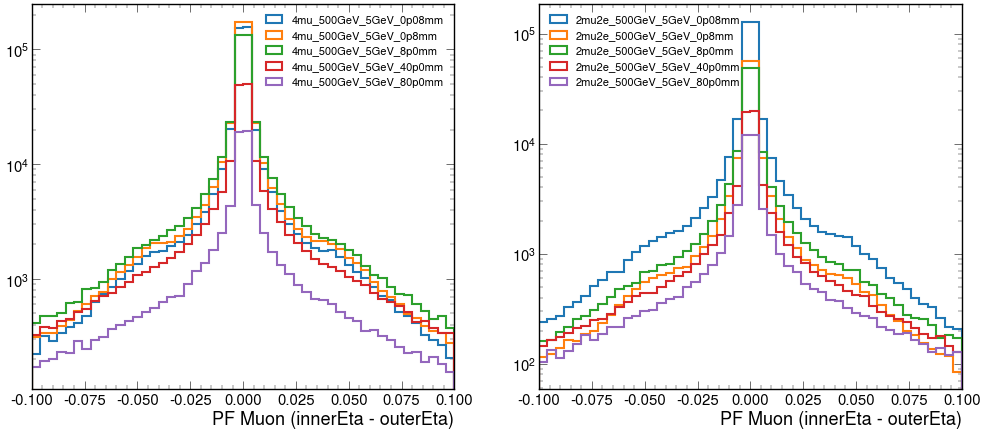

In [26]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerEta - outerEta", events_4mu[i_4mu].innerEta - events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].innerEta - events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerEta - events_4mu[i_4mu].outerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerEta - events_2mu2e[i_2mu].outerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (innerEta - outerEta)')
ax[1].set_xlabel('PF Muon (innerEta - outerEta)')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
plt.savefig("../Plots/PF_MUON/Basic/innerEta-outerEta.png", bbox_inches="tight")

## innerPhi

4mu innerPhi structure: [[0.199, -2.96, 0.156, -2.99], [1.31, -1.83, ... -0.167, 3], [-1.12, 2, 2.04, -1.17]]
2mu2e innerPhi structure: [[2.13, 2.23], [3.1, 3.01], [0.4, 1.4, ... 2.94], [-5, 0.988, 1.03], [-2.27, -2.22]]
4mu innerPhi structure: [[-2.67, 0.482, 0.477, -2.72], [-2.01, ... [0.187, -2.59, -2.55, 0.155, 1.6, 1.58]]
2mu2e innerPhi structure: [[1.27, 1.32], [0.184, 0.329], [-1.58, ... [-0.292, -0.307], [2.73, 2.58, 2.02]]
4mu innerPhi structure: [[-0.723, 2.45, -0.776, -5, 1.58], ... [0.0318, 0.0325, 0.0113, -2.37, -2.35]]
2mu2e innerPhi structure: [[-1.63, -1.66], [1.6, 1.61], [2.36, ... -0.448], [-0.156, -0.113], [1.65, 1.62]]
4mu innerPhi structure: [[-5, 2.43, -5, 2.51], [-5, -5, -5, -1.47], ... -5, -5, -5], [-5, -5, -5, -5, -5]]
2mu2e innerPhi structure: [[0.703, 0.671], [-1.56, -1.43], [3.04], ... [-5], [-5, -0.707], [-2.94, -2.9]]
4mu innerPhi structure: [[-5, -5, 1.94], [], [-5, -5, 0.34], ... -5, -1.92, -1.9], [-5, 1.99], [-5, -0.801]]
2mu2e innerPhi structure: [[-5,

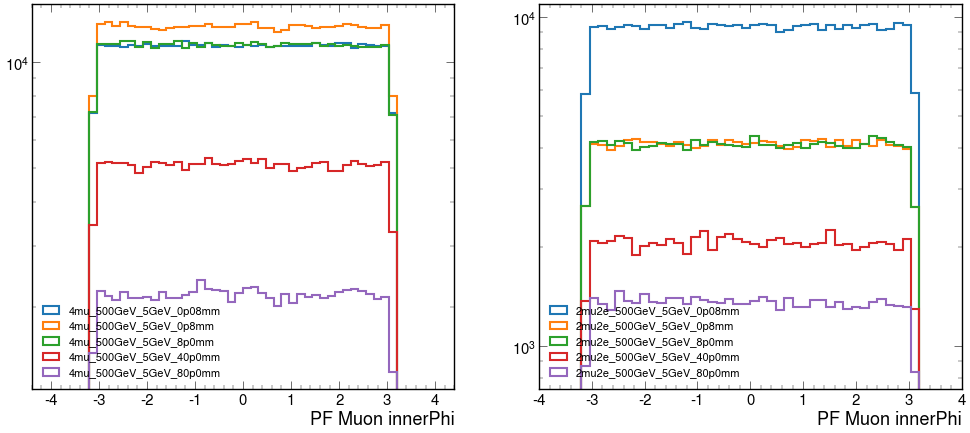

In [34]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerPhi", events_4mu[i_4mu].innerPhi, events_2mu2e[i_2mu].innerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4.4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('PF Muon innerPhi')
ax[1].set_xlabel('PF Muon innerPhi')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='lower left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Basic/innerPhi.png", bbox_inches="tight")

## phi - innerPhi

4mu phi - innerPhi structure: [[-6.87e-06, 7.87e-06, 1.04e-05, 7.63e-06, ... 8.58e-05, 0.00017, -3.81e-05]]
2mu2e phi - innerPhi structure: [[0.000145, 0.000123], [2.1e-05, 9.8e-05, ... 0.000122], [0.000143, 1.91e-06]]
4mu phi - innerPhi structure: [[-6.72e-05, -4.62e-06, 1.83e-05, 0.000167, ... 2.47e-06, -6.44e-05, 5.01e-05]]
2mu2e phi - innerPhi structure: [[-6.38e-05, -2.46e-05], [5.68e-05, ... [0.000109, -0.000187, -0.000148]]
4mu phi - innerPhi structure: [[-2.88e-05, 0.00306, 5.8e-05, 7.73, ... 0.000565, -9.42e-07, -3.96e-05, 8.82e-06]]
2mu2e phi - innerPhi structure: [[9.82e-05, 1.07e-05], [-2.71e-05, 7.26e-05, ... 5.55e-06], [-6.74e-05, 0.000103]]
4mu phi - innerPhi structure: [[4.51, -1.24e-05, 4.49, -0.000161], [3.04, ... [7.68, 7.66, 3.94, 3.94, 3.95]]
2mu2e phi - innerPhi structure: [[-1.76e-05, 2.9e-05], [-9.3e-06, -2.19e-05, ... 4.99e-05], [-0.00024, 0.000107]]
4mu phi - innerPhi structure: [[4.12, 7.31, -0.0244], [], [2.17, 5.34, ... [3.85, 2.83e-05], [7.86, -5.21e-05]]


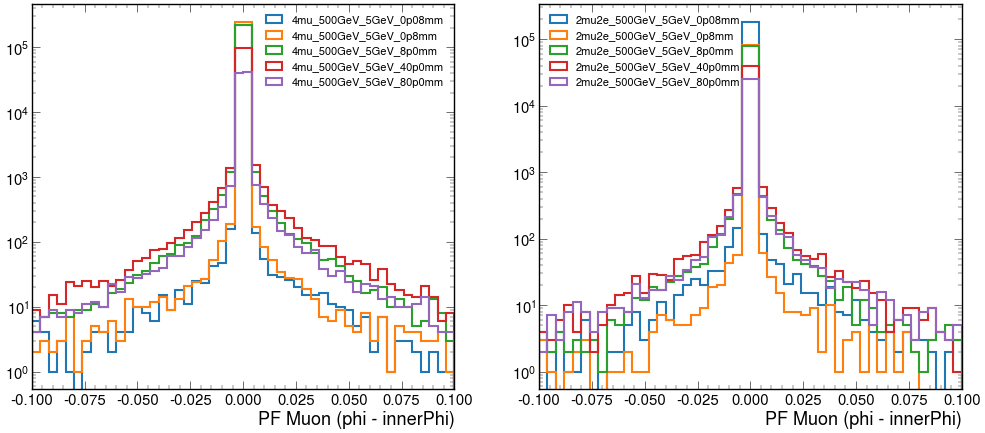

In [36]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi - innerPhi", events_4mu[i_4mu].phi - events_4mu[i_4mu].innerPhi, events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].innerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi - events_4mu[i_4mu].innerPhi), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].innerPhi), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (phi - innerPhi)')
ax[1].set_xlabel('PF Muon (phi - innerPhi)')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16,loc="upper left")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Basic/phi-innerPhi.png", bbox_inches="tight")

## innerPhi - outerPhi

4mu innerPhi - outerPhi structure: [[0.0178, 0.0182, -0.0165, -0.0191], ... [-0.0118, -0.00906, 0.0352, 0.0423]]
2mu2e innerPhi - outerPhi structure: [[-0.0105, 0.0417], [0.0129, 5.74], ... -7.52, -0.00929, 0.0238], [0.0107, -0.02]]
4mu innerPhi - outerPhi structure: [[-0.0195, -0.0323, 0.0308, 0.0209], ... -0.0119, 0.0156, 0.0893, -0.0188, -0.155]]
2mu2e innerPhi - outerPhi structure: [[-0.0114, 0.0222], [-0.0111, 0.514], ... -0.0221, 0.0307], [0.0192, -0.274, -0.112]]
4mu innerPhi - outerPhi structure: [[0.0137, 0.0193, -0.0176, -7.93, 0.201, ... 0.0128, -0.00717, 0.00568, 0.012]]
2mu2e innerPhi - outerPhi structure: [[0.0278, -0.0125], [-0.019, 0.0253], ... [-0.0142, 0.0314], [-0.00841, 0.0343]]
4mu innerPhi - outerPhi structure: [[-4.5, -0.00548, -4.53, 0.0238], [-3.04, ... [-7.69, -7.66, -3.95, -3.96, -3.84]]
2mu2e innerPhi - outerPhi structure: [[-0.0207, 0.0439], [-0.0167, 0.446], ... [-3.64, 0.0411], [0.0187, -0.0885]]
4mu innerPhi - outerPhi structure: [[-4.19, -7.48, -0.394],

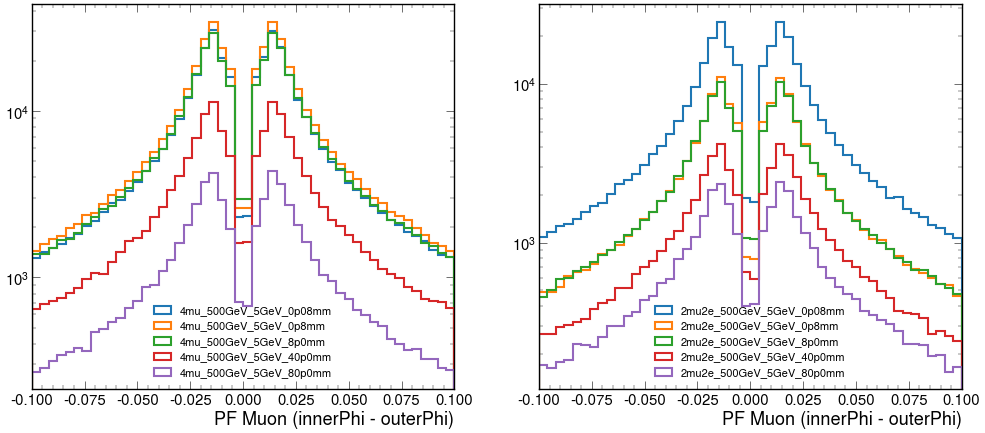

In [37]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerPhi - outerPhi", events_4mu[i_4mu].innerPhi - events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].innerPhi - events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerPhi - events_4mu[i_4mu].outerPhi), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerPhi - events_2mu2e[i_2mu].outerPhi), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (innerPhi - outerPhi)')
ax[1].set_xlabel('PF Muon (innerPhi - outerPhi)')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Basic/innerPhi-outerPhi.png", bbox_inches="tight")